<a href="https://colab.research.google.com/github/elia-orsini/elia-orsini.github.io/blob/master/mars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pickle
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
IMG_WIDTH = 256
IMG_HEIGHT = 193
NUM_CATEGORIES = 25

In [5]:
def read_data(type):


	dataset = f"drive/My Drive/msl-images/{type}-calibrated-shuffled.txt"
	imgs = []
	labels = []


	with open(dataset, 'r') as f:
		for line in f.readlines():
			#print(f.readlines())
			line = line.replace('\n', '')
			line = line.split(' ')
			path = f"./drive/My Drive/msl-images/{line[0]}"
			#print(os.listdir(path))
			#path = '/calibrated/' + line[0]

			img = cv2.imread(path)
			#print(img)
			img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
			imgs.append(img)
			labels.append(line[1])

	return (imgs, labels)

In [6]:
data_augmentation = tf.keras.Sequential([
 		tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
		tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

standard_model = tf.keras.applications.EfficientNetB7(
	include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
)
standard_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")

inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = data_augmentation(inputs)
x = standard_model(inputs)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
	optimizer=tf.keras.optimizers.Adam(lr=0.0001),
	loss="categorical_crossentropy",
	metrics=['accuracy'])

258080768/258076736 [==============================] - 7s 0us/step


NEVER EVER RUN THIS CODE AGAIN
(TAKES AGES TO RETRIVE IMAGES' PIXELS AND STORE THEM INTO ARRAY)

In [8]:
################################################################# 
train_x, train_y = read_data('train')
val_x, val_y = read_data('val')
test_x, test_y = read_data('test')

train_y = tf.keras.utils.to_categorical(train_y)
val_y = tf.keras.utils.to_categorical(val_y)
test_y = tf.keras.utils.to_categorical(test_y)

train_x = np.array(train_x)
train_y = np.array(train_y)

val_x = np.array(val_x)
val_y = np.array(val_y)

test_x = np.array(test_x)
test_y = np.array(test_y)
###################################################################

-------------------------------------------------------------

In [10]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 193, 256, 3)]     0         
_________________________________________________________________
efficientnetb7 (Functional)  (None, 7, 8, 2560)        64097687  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2560)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 25)                64025     
Total params: 64,161,712
Trainable params: 64,025
Non-trainable params: 64,097,687
_________________________________________________________________


-------------------------------------------------
- IMAGE AUGMENTATION (RANDOM FLIP HORIZONTAL, 0.2 ROTATION)
- GLOBAL AVERAGE POOLING 2D
- PREDICTION LAYER (SOFTMAX)
- DROPOUT (0.2)
- LEARNING RATE: 0.0001
- LOSS: CATEGORICAL CROSSENTROPY
- METRICS: ACCURACY


In [11]:
model.evaluate(val_x,  val_y, verbose=2)

52/52 - 11s - loss: 3.2241 - accuracy: 0.0591


[3.22412109375, 0.05914634093642235]

In [12]:
history = model.fit(train_x, train_y, epochs=20)
print("#EVALUATION RESULTS:")
model.evaluate(val_x,  val_y, verbose=2)

Epoch 1/20
118/118 [==============================] - 26s 224ms/step - loss: 2.0446 - accuracy: 0.6351
Epoch 2/20
118/118 [==============================] - 26s 222ms/step - loss: 0.9539 - accuracy: 0.7977
Epoch 3/20
118/118 [==============================] - 26s 221ms/step - loss: 0.6622 - accuracy: 0.8409
Epoch 4/20
118/118 [==============================] - 26s 221ms/step - loss: 0.5059 - accuracy: 0.8825
Epoch 5/20
118/118 [==============================] - 26s 221ms/step - loss: 0.4084 - accuracy: 0.9026
Epoch 6/20
118/118 [==============================] - 26s 221ms/step - loss: 0.3407 - accuracy: 0.9231
Epoch 7/20
118/118 [==============================] - 26s 221ms/step - loss: 0.2912 - accuracy: 0.9335
Epoch 8/20
118/118 [==============================] - 26s 221ms/step - loss: 0.2576 - accuracy: 0.9391
Epoch 9/20
118/118 [==============================] - 26s 221ms/step - loss: 0.2244 - accuracy: 0.9517
Epoch 10/20
118/118 [==============================] - 26s 221ms/step - l

[1.0476473569869995, 0.6926829218864441]

In [13]:
standard_model.trainable = True

fine_tune_at = 500

for layer in standard_model.layers[:fine_tune_at]:
  layer.trainable =  False

model.compile(
	optimizer=tf.keras.optimizers.Adam(lr=0.0001/10),
	loss="categorical_crossentropy",
	metrics=['accuracy'])

In [14]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 193, 256, 3)]     0         
_________________________________________________________________
efficientnetb7 (Functional)  (None, 7, 8, 2560)        64097687  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2560)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 25)                64025     
Total params: 64,161,712
Trainable params: 54,401,265
Non-trainable params: 9,760,447
_________________________________________________________________


In [15]:
history_fine = model.fit(train_x, train_y, epochs=30, initial_epoch=history.epoch[-1])
print("#EVALUATION RESULTS:")
model.evaluate(val_x,  val_y, verbose=2)

Epoch 20/30
118/118 [==============================] - 46s 392ms/step - loss: 1.0791 - accuracy: 0.8177
Epoch 21/30
118/118 [==============================] - 46s 391ms/step - loss: 0.2588 - accuracy: 0.9672
Epoch 22/30
118/118 [==============================] - 46s 390ms/step - loss: 0.1208 - accuracy: 0.9816
Epoch 23/30
118/118 [==============================] - 46s 390ms/step - loss: 0.0807 - accuracy: 0.9880
Epoch 24/30
118/118 [==============================] - 46s 390ms/step - loss: 0.0587 - accuracy: 0.9883
Epoch 25/30
118/118 [==============================] - 46s 390ms/step - loss: 0.0468 - accuracy: 0.9896
Epoch 26/30
118/118 [==============================] - 46s 391ms/step - loss: 0.0417 - accuracy: 0.9925
Epoch 27/30
118/118 [==============================] - 46s 391ms/step - loss: 0.0384 - accuracy: 0.9904
Epoch 28/30
118/118 [==============================] - 46s 391ms/step - loss: 0.0295 - accuracy: 0.9939
Epoch 29/30
118/118 [==============================] - 46s 391ms

[1.0657694339752197, 0.7408536672592163]

In [ ]:
for i in range(10):
  aa = val_x[i]
  predictions = model.predict_on_batch(aa).flatten()

# Apply a sigmoid since our model returns logits
  predictions = tf.nn.softmax(predictions)
  predictions = tf.argmax(predictions)

#predictions = tf.where(predictions < 0.5, 0, 1)
  print(predictions)
  print(tf.argmax(val_y[i]))
  print()

In [17]:
history_fine2 = model.fit(train_x, train_y, epochs=50, initial_epoch=history_fine.epoch[-1])
print("#EVALUATION RESULTS:")
model.evaluate(val_x,  val_y, verbose=2)

Epoch 30/50
118/118 [==============================] - 46s 391ms/step - loss: 0.0171 - accuracy: 0.9979
Epoch 31/50
118/118 [==============================] - 46s 391ms/step - loss: 0.0154 - accuracy: 0.9971
Epoch 32/50
118/118 [==============================] - 46s 391ms/step - loss: 0.0153 - accuracy: 0.9968
Epoch 33/50
118/118 [==============================] - 46s 391ms/step - loss: 0.0135 - accuracy: 0.9971
Epoch 34/50
118/118 [==============================] - 46s 391ms/step - loss: 0.0121 - accuracy: 0.9973
Epoch 35/50
118/118 [==============================] - 46s 391ms/step - loss: 0.0089 - accuracy: 0.9981
Epoch 36/50
118/118 [==============================] - 46s 391ms/step - loss: 0.0089 - accuracy: 0.9984
Epoch 37/50
118/118 [==============================] - 46s 391ms/step - loss: 0.0114 - accuracy: 0.9960
Epoch 38/50
118/118 [==============================] - 46s 392ms/step - loss: 0.0080 - accuracy: 0.9981
Epoch 39/50
118/118 [==============================] - 46s 392ms

[1.2482805252075195, 0.7384146451950073]

In [18]:
print("#TEST RESULTS:")
model.evaluate(test_x,  test_y, verbose=2)

#TEST RESULTS:
41/41 - 9s - loss: 0.7963 - accuracy: 0.7877


[0.7963438034057617, 0.7877394556999207]

In [121]:
errors = 0
errors_list = []
plot = []
plot2 = []
values = []
all = []
for i in range(len(test_x)):
  aa = test_x[i]
  predictions = model.predict_on_batch(aa).flatten()

# Apply a sigmoid since our model returns logits
  predictions = tf.nn.softmax(predictions)
  predictions = tf.argmax(predictions)
  
  predictions = str(predictions)
  predictions = predictions.replace('(', ' ')
  predictions = predictions.replace(',', ' ')
  predictions = predictions.split(' ')
  prediction = predictions[1]

  actual = str(tf.argmax(test_y[i]))
  actual = actual.replace('(', ' ')
  actual = actual.replace(',', ' ')
  actual = actual.split(' ')
  actual = actual[1]

  all.append(actual)
  if prediction != actual:
    errors += 1
    errors_list.append((prediction, actual))
    plot.append(f"{actual}")

print(len(test_x))
print(errors)

for i in set(plot):
  plot2.append(i)
  values.append(plot.count(i))

errors_ordered = []
for i in set(errors_list):
  a = [i, errors_list.count(i)]
  errors_ordered.append(a)

print(errors_ordered)

print(sorted(errors_ordered,key=lambda e:e[1], reverse=True))


1305
277
[[('8', '10'), 3], [('20', '24'), 3], [('18', '3'), 1], [('8', '9'), 31], [('8', '14'), 1], [('8', '12'), 4], [('2', '4'), 2], [('0', '11'), 1], [('17', '6'), 1], [('17', '21'), 1], [('17', '14'), 1], [('10', '6'), 10], [('23', '13'), 1], [('21', '7'), 42], [('9', '14'), 1], [('3', '19'), 1], [('9', '20'), 1], [('9', '13'), 2], [('21', '13'), 2], [('0', '6'), 20], [('19', '6'), 3], [('14', '10'), 1], [('21', '6'), 6], [('17', '7'), 2], [('3', '6'), 3], [('20', '10'), 4], [('11', '6'), 1], [('20', '14'), 5], [('20', '12'), 4], [('23', '17'), 2], [('20', '13'), 5], [('15', '19'), 1], [('10', '3'), 40], [('3', '11'), 1], [('0', '16'), 5], [('24', '19'), 2], [('0', '24'), 7], [('8', '19'), 8], [('18', '12'), 2], [('7', '24'), 1], [('21', '24'), 1], [('24', '10'), 7], [('24', '11'), 2], [('12', '3'), 1], [('9', '8'), 15], [('24', '6'), 10], [('4', '7'), 3], [('8', '3'), 1], [('16', '11'), 1], [('18', '6'), 1], [('16', '6'), 1], [('23', '4'), 2]]
[[('21', '7'), 42], [('10', '3'), 40

['3', '9', '7', '24', '21', '16', '11', '13', '17', '12', '8', '20', '10', '19', '4', '6', '14']
[43, 31, 47, 12, 1, 5, 5, 10, 2, 10, 15, 1, 15, 12, 4, 56, 8]

7
150

11
12

17
9

8
254

2
21

12
57

15
12

3
84

9
72

16
48

10
16

19
36

4
20

21
10

6
60

24
300

13
32

20
14

18
2

14
48

0
34

1
14



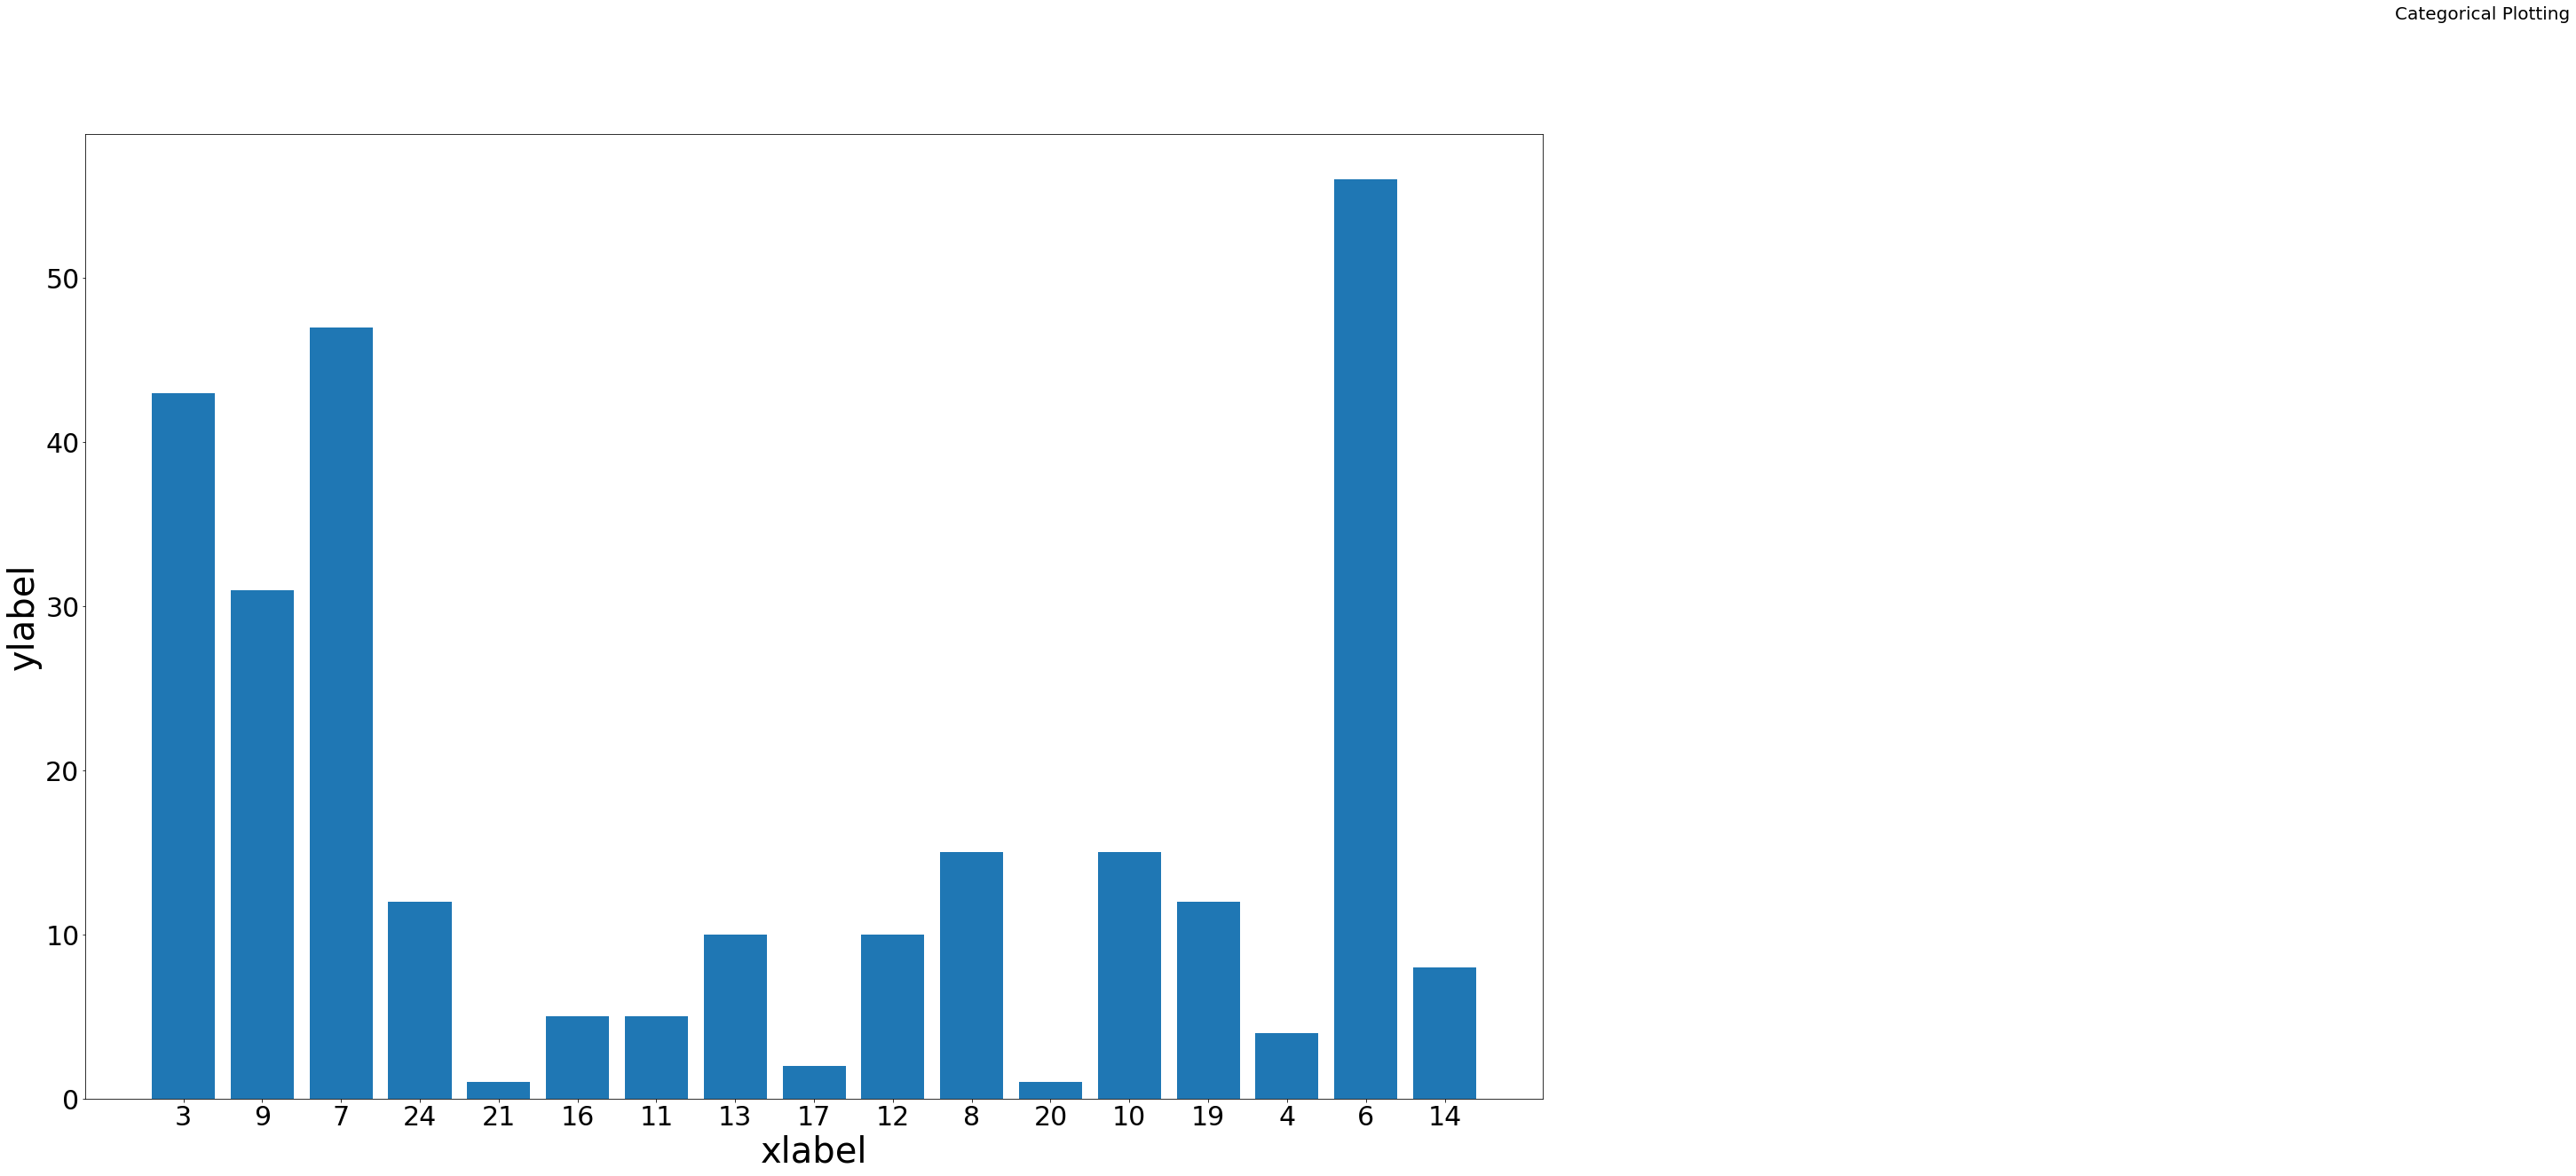

In [124]:
import matplotlib.pyplot as plt
import matplotlib

print(plot2)
print(values)
print()
for i in set(all):
  print(i)
  print(all.count(i))
  print()

matplotlib.rcParams.update({'font.size': 30})

plt.figure(figsize=(100, 20))

plt.subplot(131)
plt.bar(plot2, values, linewidth=4.0)
plt.xlabel('xlabel', fontsize=40)
plt.ylabel('ylabel', fontsize=40)

plt.suptitle('Categorical Plotting', fontsize=20)
plt.show()